In [2]:
# Import Libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional, GRU
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
# Step 1: Download data
stock_symbol = "TCS.NS"
start_date = "2015-01-01"
end_date = "2025-05-02"

df = yf.download(stock_symbol, start=start_date, end=end_date)
data = df[['Close']].dropna()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2015-01-01,1035.372681,1044.097197,1033.522002,1044.097197,366830
2015-01-02,1049.161011,1053.838501,1037.426671,1037.589327,925740
2015-01-05,1033.217041,1057.478943,1026.871883,1049.791628,1754242
2015-01-06,995.126282,1028.682202,992.441768,1028.682202,2423784
2015-01-07,983.371582,1008.365641,979.202513,1004.644024,2636332


In [5]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2025-04-24,3401.600098,3412.500000,3387.699951,3401.100098,2252175
2025-04-25,3448.000000,3477.800049,3405.000000,3420.000000,2742991
2025-04-28,3443.500000,3457.800049,3405.000000,3435.000000,1593296
2025-04-29,3472.500000,3495.000000,3430.399902,3455.000000,1578332
2025-04-30,3453.699951,3509.899902,3366.000000,3472.000000,2809332


In [6]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
count,2548.000000,2548.000000,2548.000000,2548.000000,2.548000e+03
mean,2258.583768,2281.145717,2236.664400,2259.399284,2.667780e+06
std,1073.722060,1083.066465,1065.144188,1073.958845,2.365573e+06
min,883.803101,900.144889,863.087380,890.428226,0.000000e+00
25%,1090.362518,1101.813455,1077.140792,1088.574521,1.645646e+06
50%,1951.769104,1972.500426,1933.674701,1954.850276,2.218198e+06
75%,3226.624817,3253.096332,3192.665756,3222.620157,3.088530e+06
max,4471.390137,4509.193819,4430.395122,4493.237606,8.806715e+07


In [7]:
# Step 2: Preprocessing
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i - seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)


In [13]:
from sklearn.model_selection import train_test_split

# Step: Create sequences
seq_len = 60
x, y = create_sequences(scaled_data, seq_len)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))  # 3D input for LSTM

# Step: Split using sklearn with shuffling enabled
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


In [17]:
#Step 3: Define Models
def build_vanilla_lstm():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def build_bidirectional_lstm():
    model = Sequential()
    model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(50)))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def build_stacked_lstm():
    model = Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.3))
    model.add(LSTM(100, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(100))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def build_gru_model():
    model = Sequential()
    model.add(GRU(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(GRU(50))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model#

In [18]:
models = {
    "Vanilla_LSTM": build_vanilla_lstm,
    "Bidirectional_LSTM": build_bidirectional_lstm,
    "Stacked_LSTM": build_stacked_lstm,
    "GRU_Model": build_gru_model
}

In [ ]:
# Step 4: Train, Plot, Save Models
os.makedirs("saved_models", exist_ok=True)


🔁 Training Vanilla_LSTM...


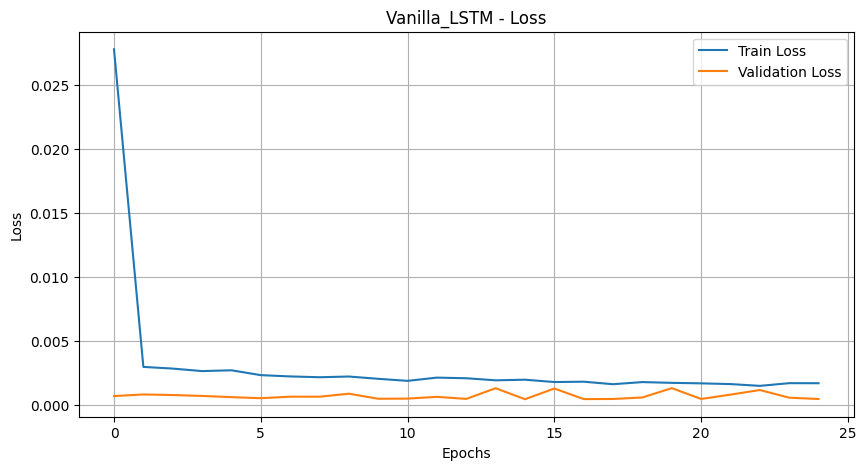

✅ Vanilla_LSTM saved as 'saved_models/Vanilla_LSTM.h5'

🔁 Training Bidirectional_LSTM...


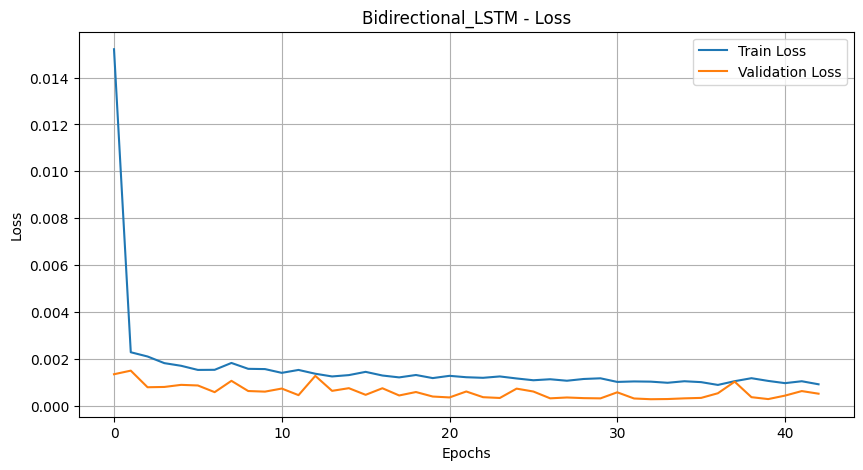

✅ Bidirectional_LSTM saved as 'saved_models/Bidirectional_LSTM.h5'

🔁 Training Stacked_LSTM...


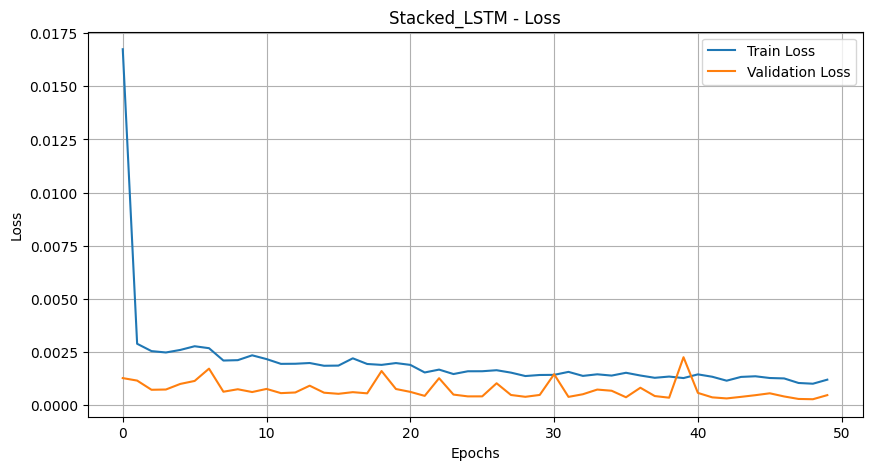

✅ Stacked_LSTM saved as 'saved_models/Stacked_LSTM.h5'

🔁 Training GRU_Model...


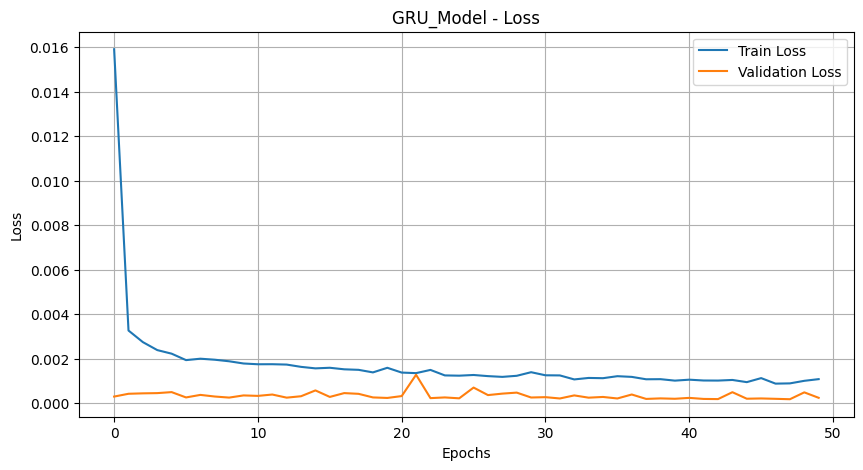

✅ GRU_Model saved as 'saved_models/GRU_Model.h5'


In [ ]:
for name, builder in models.items():
    print(f"\n🔁 Training {name}...")
    model = builder()

    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stop], verbose=0)

    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"{name} - Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

    model.save(f"saved_models/{name}.h5")
    print(f"✅ {name} saved as 'saved_models/{name}.h5'")

In [ ]:
# Step 5: Evaluation & Comparison

def predict_with_model(model, df, seq_length=60):
    raw = df[['Close']].values
    scaled = scaler.transform(raw)
    x = []
    for i in range(seq_length, len(scaled)):
        x.append(scaled[i - seq_length:i, 0])
    x = np.array(x)
    x = np.reshape(x, (x.shape[0], x.shape[1], 1))
    predictions = model.predict(x, verbose=0)
    predictions = scaler.inverse_transform(predictions)
    actual = raw[seq_length:]
    return actual.flatten(), predictions.flatten()

def naive_predictor(df):
    raw = df['Close'].values
    return raw[1:], raw[:-1]  # actual[1:], predicted[0:-1]

metrics = {
    'MAE': (mean_absolute_error, "Mean Absolute Error"),
    'RMSE': (lambda y, p: np.sqrt(mean_squared_error(y, p)), "Root Mean Squared Error"),
    'R2': (r2_score, "R² Score")
}

intervals = {'1d': 'Daily', '1wk': 'Weekly', '1mo': 'Monthly'}


In [ ]:
def compare_models(models_dir, stock, start, end):
    for interval in intervals:
        print(f"\nInterval: {intervals[interval]} ({interval})")
        df = yf.download(stock, start=start, end=end, interval=interval).dropna()

        if len(df) < 100:
            print(f"Not enough data for {interval}")
            continue

        actual_naive, pred_naive = naive_predictor(df)

        for name in models.keys():
            print(f"\nComparing model: {name}")
            model = load_model(f"{models_dir}/{name}.h5")
            actual, pred = predict_with_model(model, df)

            min_len = min(len(actual), len(pred), len(pred_naive))
            actual, pred, actual_naive, pred_naive = actual[-min_len:], pred[-min_len:], actual_naive[-min_len:], pred_naive[-min_len:]

            # Show metrics
            for m, (func, label) in metrics.items():
                print(f"{label} - {name}: {func(actual, pred):.4f}, Naive: {func(actual_naive, pred_naive):.4f}")

            # Plotting
            plt.figure(figsize=(12, 5))
            plt.plot(actual, label='Actual', color='black')
            plt.plot(pred, label=f'{name} Prediction', color='blue')
            plt.plot(pred_naive, label='Naive Prediction', color='orange')
            plt.title(f"{stock} - {intervals[interval]} Comparison ({name})")
            plt.xlabel("Time Steps")
            plt.ylabel("Stock Price")
            plt.legend()
            plt.tight_layout()
            plt.grid(True)
            plt.show()


Interval: Daily (1d)


[*********************100%***********************]  1 of 1 completed



Comparing model: Vanilla_LSTM
Mean Absolute Error - Vanilla_LSTM: 44.2924, Naive: 18.4238
Root Mean Squared Error - Vanilla_LSTM: 64.8691, Naive: 29.6493
R² Score - Vanilla_LSTM: 0.9970, Naive: 0.9994


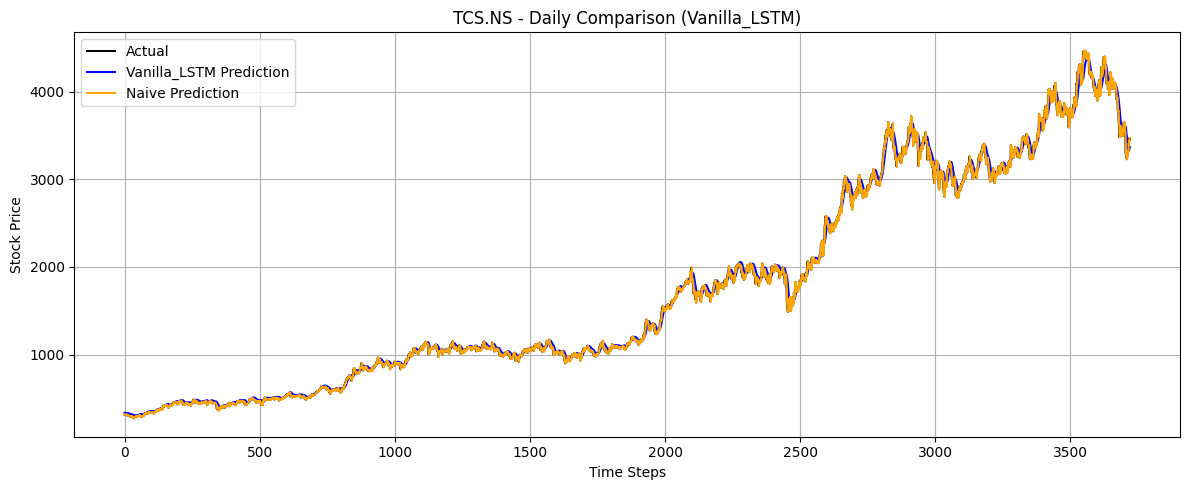


Comparing model: Bidirectional_LSTM
Mean Absolute Error - Bidirectional_LSTM: 38.8954, Naive: 18.4238
Root Mean Squared Error - Bidirectional_LSTM: 52.7921, Naive: 29.6493
R² Score - Bidirectional_LSTM: 0.9980, Naive: 0.9994


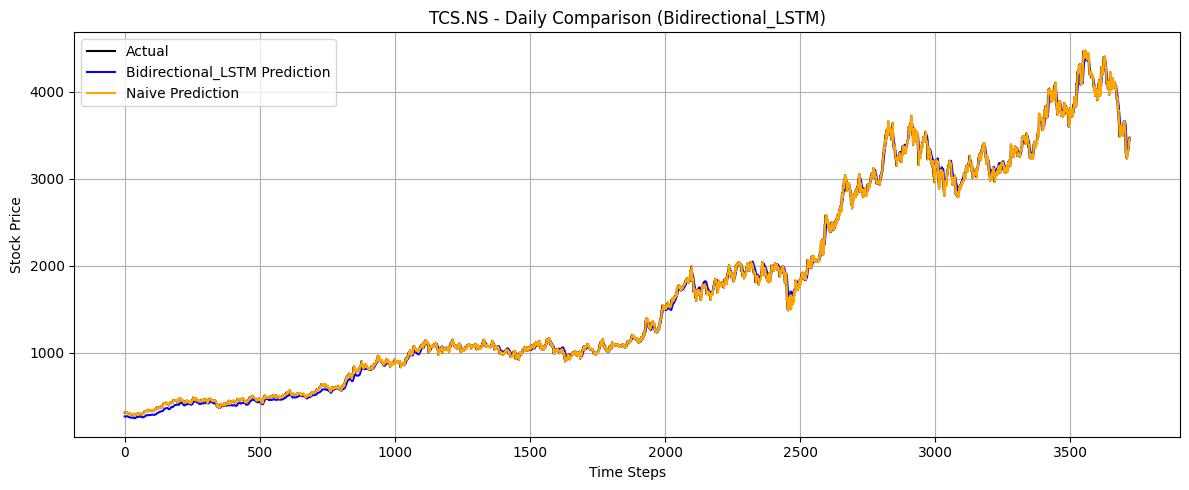


Comparing model: Stacked_LSTM
Mean Absolute Error - Stacked_LSTM: 36.2130, Naive: 18.4238
Root Mean Squared Error - Stacked_LSTM: 51.5290, Naive: 29.6493
R² Score - Stacked_LSTM: 0.9981, Naive: 0.9994


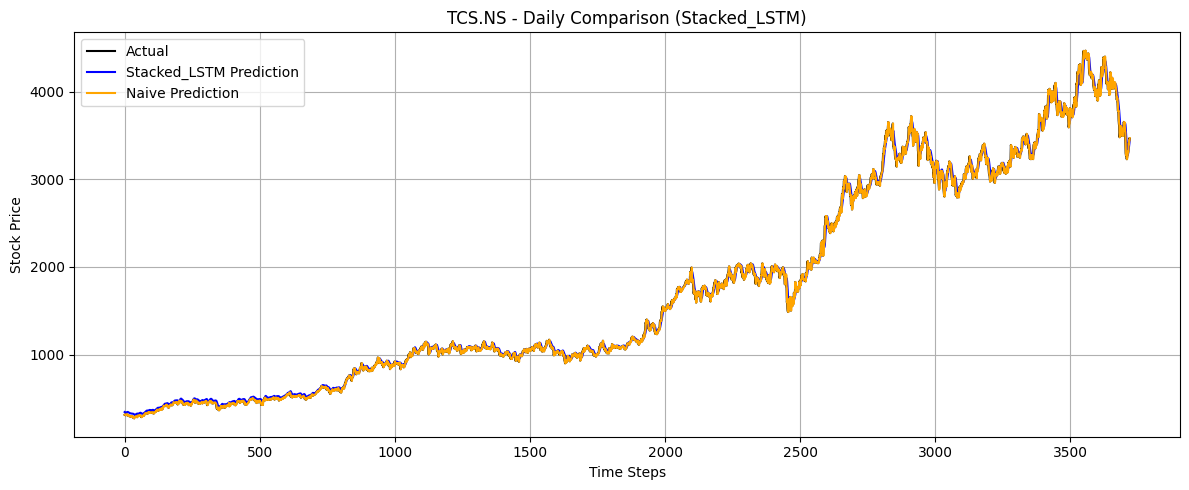


Comparing model: GRU_Model
Mean Absolute Error - GRU_Model: 25.7280, Naive: 18.4238
Root Mean Squared Error - GRU_Model: 38.2165, Naive: 29.6493
R² Score - GRU_Model: 0.9990, Naive: 0.9994


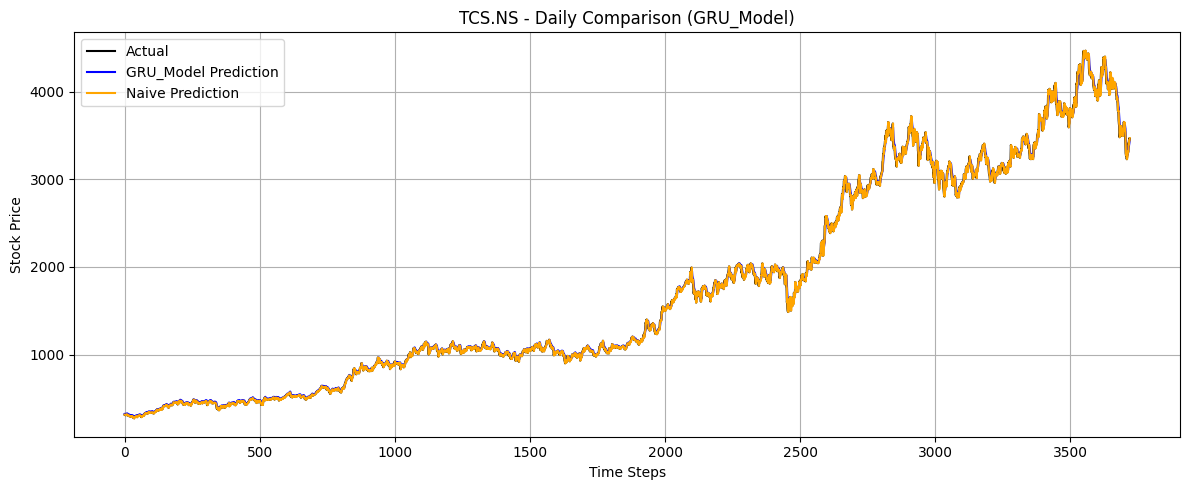

[*********************100%***********************]  1 of 1 completed


Interval: Weekly (1wk)

Comparing model: Vanilla_LSTM


Mean Absolute Error - Vanilla_LSTM: 86.5752, Naive: 45.7672
Root Mean Squared Error - Vanilla_LSTM: 129.2840, Naive: 68.7569
R² Score - Vanilla_LSTM: 0.9877, Naive: 0.9965


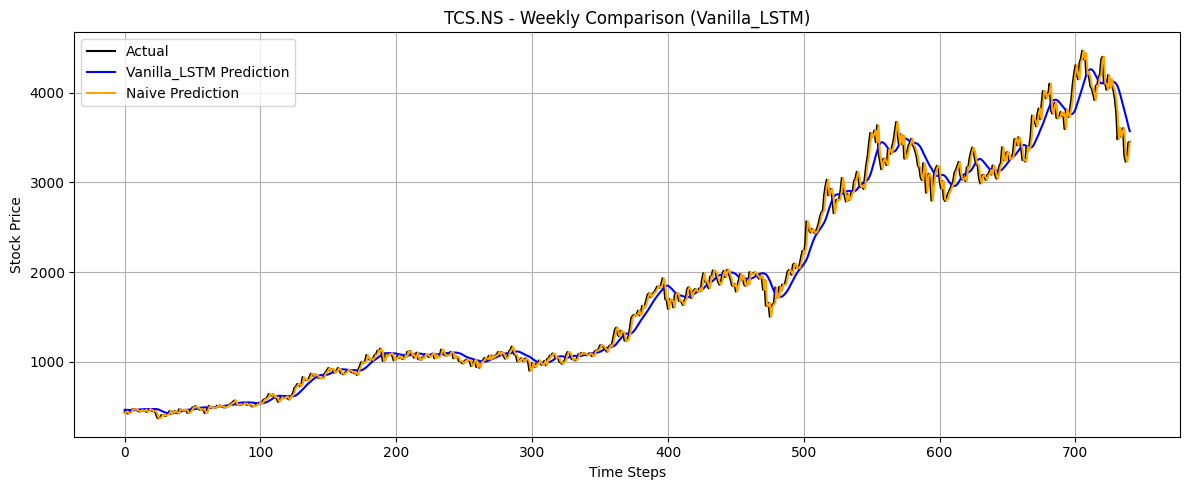


Comparing model: Bidirectional_LSTM
Mean Absolute Error - Bidirectional_LSTM: 88.3820, Naive: 45.7672
Root Mean Squared Error - Bidirectional_LSTM: 117.5991, Naive: 68.7569
R² Score - Bidirectional_LSTM: 0.9898, Naive: 0.9965


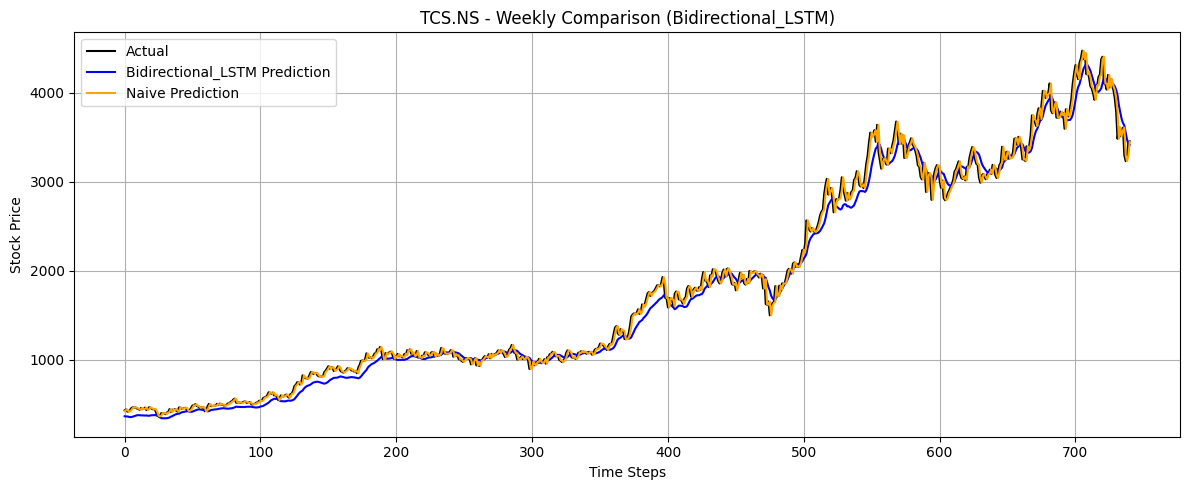


Comparing model: Stacked_LSTM
Mean Absolute Error - Stacked_LSTM: 73.6045, Naive: 45.7672
Root Mean Squared Error - Stacked_LSTM: 107.6682, Naive: 68.7569
R² Score - Stacked_LSTM: 0.9914, Naive: 0.9965


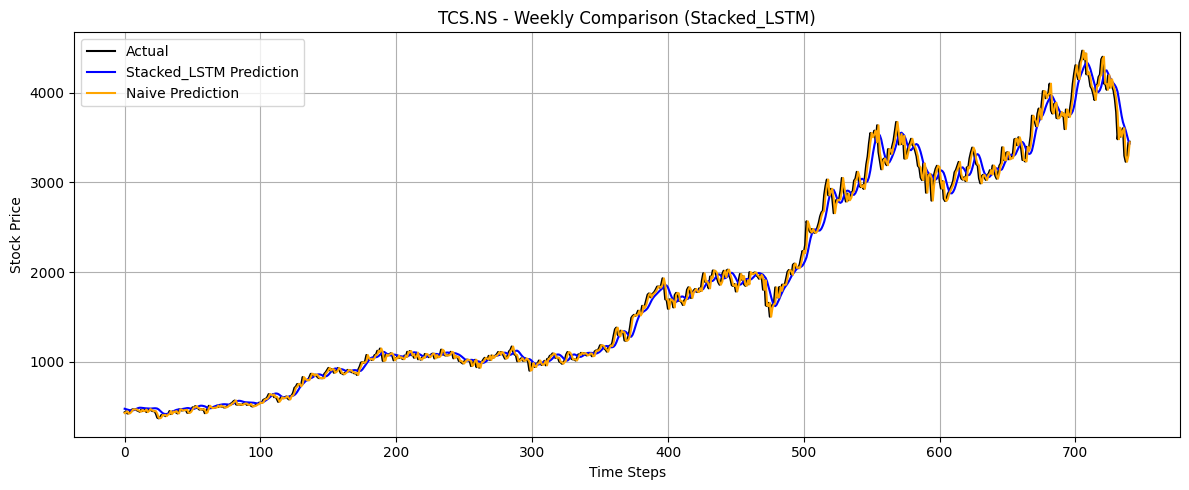


Comparing model: GRU_Model
Mean Absolute Error - GRU_Model: 54.5307, Naive: 45.7672
Root Mean Squared Error - GRU_Model: 81.4826, Naive: 68.7569
R² Score - GRU_Model: 0.9951, Naive: 0.9965


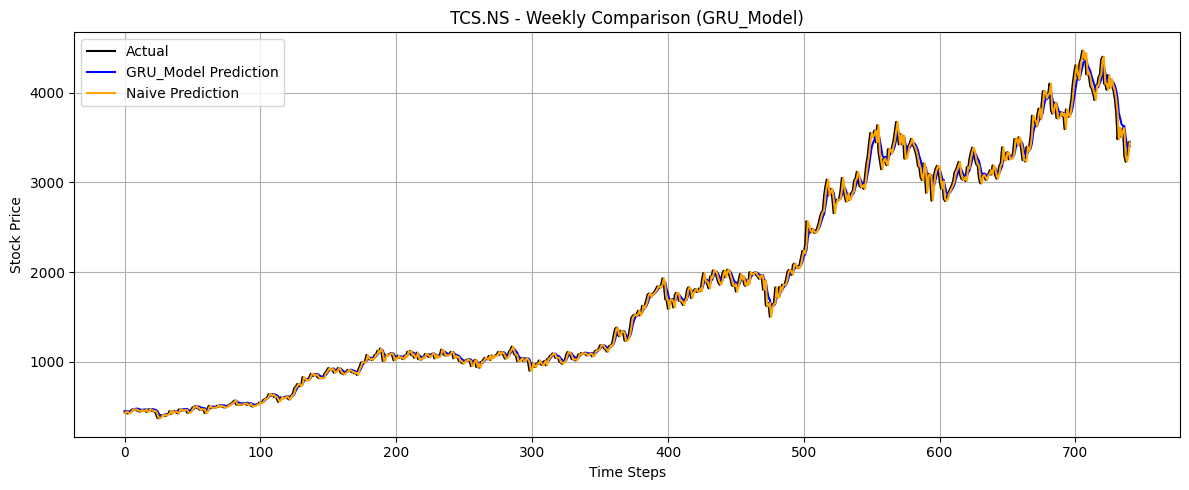

[*********************100%***********************]  1 of 1 completed



Interval: Monthly (1mo)

Comparing model: Vanilla_LSTM
Mean Absolute Error - Vanilla_LSTM: 213.1543, Naive: 115.1032
Root Mean Squared Error - Vanilla_LSTM: 295.2521, Naive: 156.4646
R² Score - Vanilla_LSTM: 0.9208, Naive: 0.9778


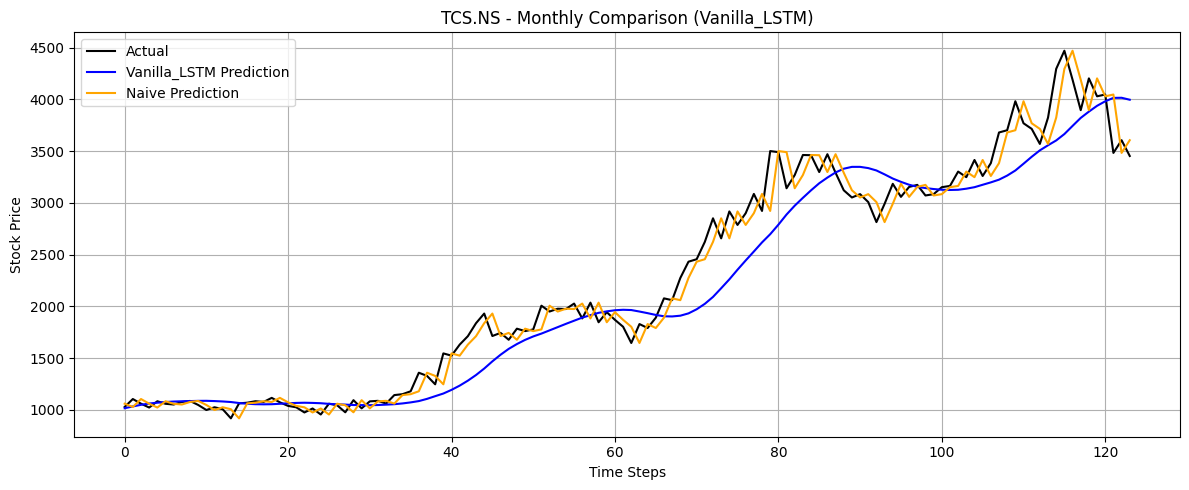


Comparing model: Bidirectional_LSTM


Mean Absolute Error - Bidirectional_LSTM: 258.6347, Naive: 115.1032
Root Mean Squared Error - Bidirectional_LSTM: 312.1752, Naive: 156.4646
R² Score - Bidirectional_LSTM: 0.9115, Naive: 0.9778


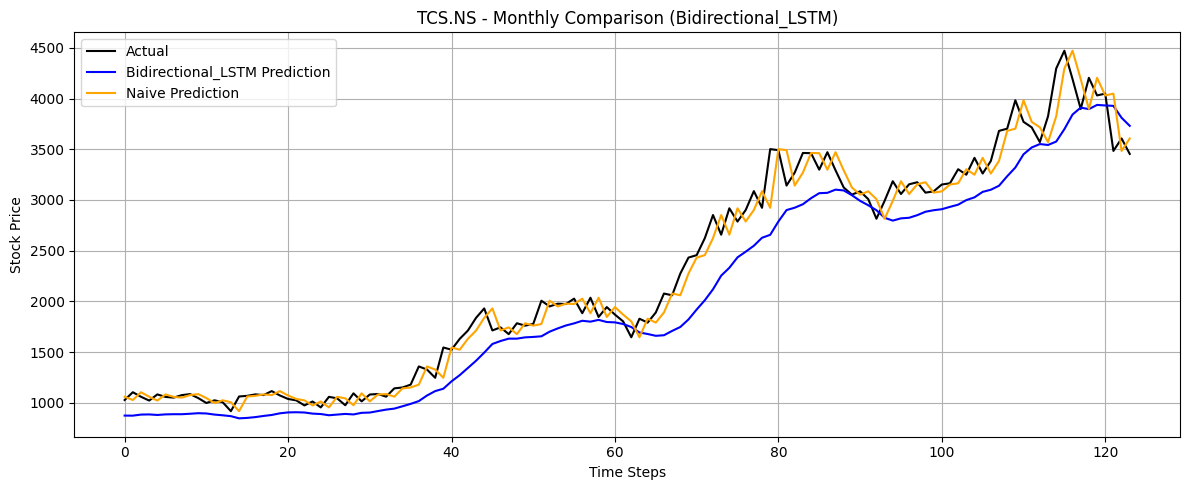


Comparing model: Stacked_LSTM
Mean Absolute Error - Stacked_LSTM: 157.9457, Naive: 115.1032
Root Mean Squared Error - Stacked_LSTM: 222.1444, Naive: 156.4646
R² Score - Stacked_LSTM: 0.9552, Naive: 0.9778


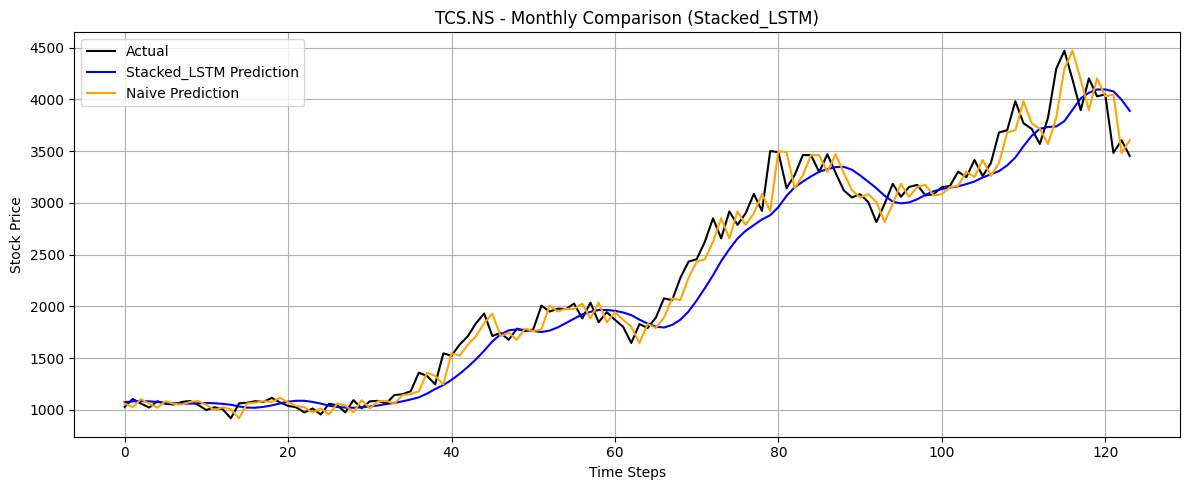


Comparing model: GRU_Model
Mean Absolute Error - GRU_Model: 120.9029, Naive: 115.1032
Root Mean Squared Error - GRU_Model: 171.9309, Naive: 156.4646
R² Score - GRU_Model: 0.9731, Naive: 0.9778


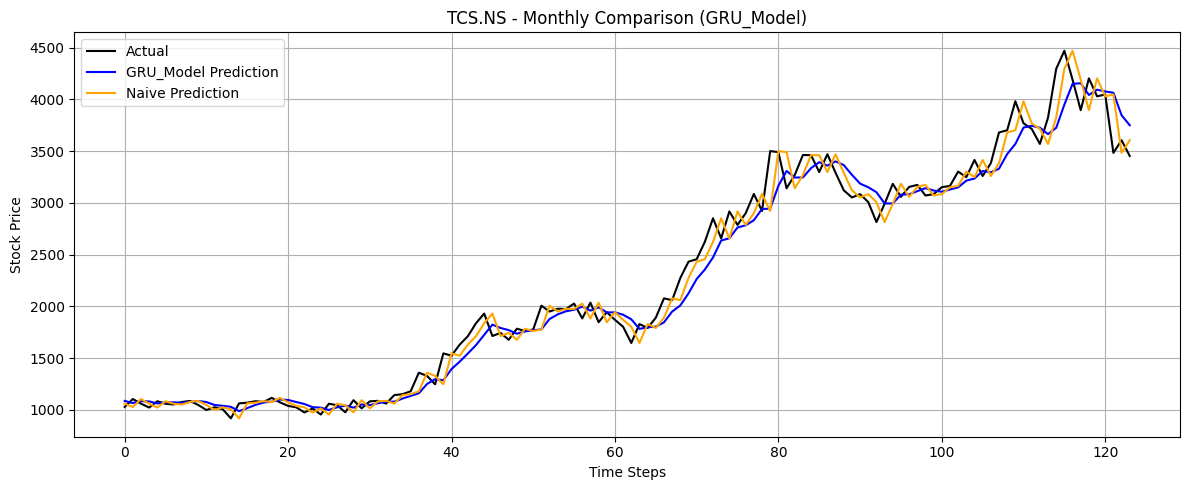

In [ ]:
compare_models("saved_models", stock_symbol, "2010-01-01", "2025-05-02")